# Jupyter notebook for debugging

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Copied from `train` function in train_simple.py:L78
import yaml

device = 'cpu'
hyp = 'data/hyps/hyp.scratch-low.yaml'

with open(hyp, errors="ignore") as f:
    hyp = yaml.safe_load(f)  # load hyps dict

In [ ]:
from models.yolo import Model
from utils.general import check_dataset

cfg = 'models/yolov5n_nuscenes.yaml'
data = 'data/nuscenes.yaml'
data_dict = check_dataset(data)

nc = int(data_dict["nc"])  # number of classes
model = Model(cfg, ch=3, nc=nc, anchors=hyp.get("anchors")).to(device)  # create

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

# 9개의 앵커 박스 크기 리스트
anchors = [
    [12.068743299746195, 14.469510286321855],
    [16.0, 30.0],
    [35.663279722908726, 23.570565835267995],
    [74.02029317455464, 37.26202213644209],
    [62.0, 45.0],
    [36.73338124495964, 81.06094169072117],
    [120.29237569234083, 90.06649718784412],
    [80.26835342402529, 200.73499626128296],
    [156.0, 198.0]
]

def draw_anchors(anchors, img_size=416):
    plt.figure(figsize=(8, 8))
    
    for i, (width, height) in enumerate(anchors):
        rect = plt.Rectangle(((img_size - width) / 2, (img_size - height) / 2), width, height, fill=False, edgecolor='r', linestyle='dashed')
        plt.gca().add_patch(rect)
        # plt.text((img_size) / 2, (img_size) / 2 + i*20 - 80, f'{(width, height)}', ha='center', va='center', color='blue', fontsize=12)
    
    plt.xlim(0, img_size)
    plt.ylim(0, img_size)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title('YOLOv5 Anchors')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.grid(True)
    plt.gca().set_facecolor('black')
    plt.gca().invert_yaxis()
    plt.savefig('./anchorbox.png')

    plt.show()

draw_anchors(anchors)


## object size distribution

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import yaml

dataset_yaml = './data/nuscenes_autoanchor.yaml'
img_size = 416

def load_dataset(dataset_yaml):
    with open(dataset_yaml, 'r') as f:
        data_dict = yaml.safe_load(f)
    from utils.dataloaders import LoadImagesAndLabels
    dataset = LoadImagesAndLabels(data_dict['train'], img_size=img_size, batch_size=32, augment=True, rect=True)
    return dataset

dataset = load_dataset(dataset_yaml)
shapes = img_size * dataset.shapes / dataset.shapes.max(1, keepdims=True)
wh = np.concatenate([l[:, 3:5] * s for s, l in zip(shapes, dataset.labels)])

plt.figure(figsize=(10, 6))
plt.scatter(wh[:, 0], wh[:, 1], alpha=0.3, label='Object Sizes')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Object Sizes Distribution')
plt.legend()


plt.savefig('./object_sizes_distribution.png')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import yaml

dataset_yaml = './data/nuscenes_autoanchor.yaml'
model_yaml = './models/yolov5n_nuscenes.yaml'
img_size = 416

def load_dataset(dataset_yaml):
    with open(dataset_yaml, 'r') as f:
        data_dict = yaml.safe_load(f)
    from utils.dataloaders import LoadImagesAndLabels
    dataset = LoadImagesAndLabels(data_dict['train'], img_size=img_size, batch_size=32, augment=True, rect=True)
    return dataset

def load_anchors(model_yaml):
    with open(model_yaml, 'r') as f:
        model_dict = yaml.safe_load(f)
    anchors = model_dict['anchors']
    return anchors

# 데이터셋 로드
dataset = load_dataset(dataset_yaml)
shapes = img_size * dataset.shapes / dataset.shapes.max(1, keepdims=True)
wh = np.concatenate([l[:, 3:5] * s for s, l in zip(shapes, dataset.labels)])

# 앵커 로드
anchors = load_anchors(model_yaml)

# 객체 크기 분포 시각화
plt.figure(figsize=(10, 6))
plt.scatter(wh[:, 0], wh[:, 1], alpha=0.3, label='Object Sizes')

colors = ['r', 'g', 'b']

# 앵커 시각화
for i, anchor in enumerate(anchors):
    width = anchor[0]
    height = anchor[1]
    plt.scatter(width, height, color=colors[i % len(colors)], marker='x', s=100, label=f'Anchor {i+1}')

plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Object Sizes and Anchors Distribution')
plt.legend()
plt.grid(True)
plt.savefig('./anchor_box_distribution.png')
plt.show()


## Qualitative evaluation

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Copied from `train` function in train_simple.py:L78
import yaml

device = 'cpu'
hyp = 'data/hyps/hyp.scratch-low.yaml'

with open(hyp, errors="ignore") as f:
    hyp = yaml.safe_load(f)  # load hyps dict
from models.yolo import Model
from utils.general import check_dataset

cfg = 'models/yolov5n_nuscenes.yaml'
data = 'data/nuscenes.yaml'
data_dict = check_dataset(data)

nc = int(data_dict["nc"])  # number of classes
model = Model(cfg, ch=3, nc=nc, anchors=hyp.get("anchors")).to(device)  # create

Overriding model.yaml nc=4 with nc=15

                 from  n    params  module                                  arguments                     
  0                -1  1      1760  models.common.Conv                      [3, 16, 6, 2, 2]              
  1                -1  1      4672  models.common.Conv                      [16, 32, 3, 2]                
  2                -1  1      4800  models.common.C3                        [32, 32, 1]                   
  3                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  4                -1  2     29184  models.common.C3                        [64, 64, 2]                   
  5                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  6                -1  3    156928  models.common.C3                        [128, 128, 3]                 
  7                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]             

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from utils.dataloaders import create_dataloader
from utils.general import check_img_size, colorstr

imgsz = 416
batch_size = 1
single_cls = False
seed = 0

train_path = data_dict["train"]
test_path = data_dict["test"]
gs = max(int(model.stride.max()), 32)  # grid size (max stride)
imgsz = check_img_size(imgsz, gs, floor=gs * 2)  # verify imgsz is gs-multiple

train_loader, dataset = create_dataloader(
    train_path,
    imgsz,
    batch_size,
    gs,
    single_cls,
    hyp=hyp,
    augment=True,
    cache=None,
    rect=False,
    rank=-1,
    workers=8,
    image_weights=False,
    quad=False,
    prefix=colorstr("train: "),
    shuffle=True,
    seed=seed,
)

test_loader, dataset = create_dataloader(
    test_path,
    imgsz,
    batch_size,
    gs,
    single_cls,
    hyp=hyp,
    augment=False,
    cache=None,
    rect=False,
    rank=-1,
    workers=8,
    image_weights=False,
    quad=False,
    prefix=colorstr("test: "),
    shuffle=False,
    seed=seed,
)

train: Scanning /home/mmc-server4/Server/Datasets_hdd/nuscenes_det2d/train.cache
test: Scanning /home/mmc-server4/Server/Datasets_hdd/nuscenes_det2d/test.cache..


In [7]:
for imgs, targets, paths, _ in test_loader:
    imgs = imgs.to(device, non_blocking=True).float() / 255  # uint8 to float32, 0-255 to 0.0-1.0
    break

In [8]:

import torch
from models.common import DetectMultiBackend
from utils.torch_utils import select_device

weights = 'yolov5n_base.pt'
data = 'data/nuscenes.yaml'
# data = 'data/coco128.yaml'
half = False  # use FP16 half-precision inference
dnn = False  # use OpenCV DNN for ONNX inference
device = select_device('cpu')

model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)

# inference
model.eval()
with torch.no_grad():
    pred = model(imgs)  # forward

YOLOv5 🚀 ddf4e91 Python-3.12.3 torch-2.2.2 CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs


In [9]:
from utils.general import non_max_suppression
import matplotlib.patches as patches

conf_thres = 0.25  # confidence threshold
iou_thres = 0.45  # NMS IOU threshold
max_det = 1000  # maximum detections per image
classes = None
agnostic_nms = False  # class-agnostic NMS

pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det)

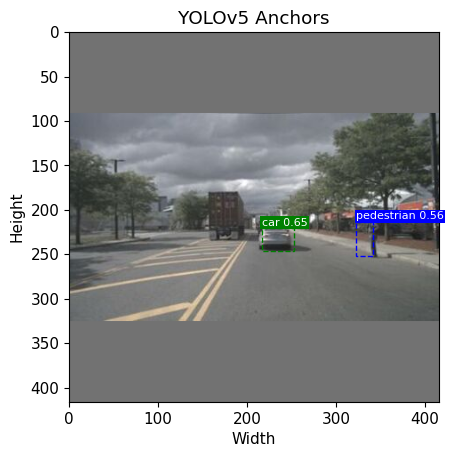

In [13]:
# [TODO] draw predictions (see detect.py:L178)

class_names = {
    0: 'pedestrian', 1: 'animal', 2: 'car', 3: 'motorcycle',
    4: 'bicycle', 5: 'bus', 6: 'truck', 7: 'construction_vehicle',
    8: 'emergency', 9: 'trailer', 10: 'barrier', 11: 'traffic_cone',
    12: 'pushable_pullable', 13: 'debris', 14: 'bicycle_rack'
}

colors = {
    0: 'blue', 1: 'orange', 2: 'green', 3: 'red',
    4: 'purple', 5: 'brown', 6: 'pink', 7: 'gray',
    8: 'olive', 9: 'cyan', 10: 'magenta', 11: 'yellow',
    12: 'black', 13: 'gold', 14: 'lime'
}

def plot_inference(img, anchors, image_shape=(416, 416)):
    fig, ax = plt.subplots(1)
    img = img[0].permute(1, 2, 0).cpu().numpy()
    ax.imshow(img, extent=[0, image_shape[1], image_shape[0], 0], cmap='gray')

    for i, anchor in enumerate(anchors):
        for j in range(anchor.shape[0]):
            x1, y1, x2, y2, conf ,label = anchor[j, :]
            w = x2 - x1
            h = y2 - y1
            rect = patches.Rectangle(
                (x1, y1), w, h,
                linewidth=1, edgecolor=colors[int(label)], facecolor='none', linestyle='--'
            )
            ax.add_patch(rect)
            ax.text(x1, y1 - 12, f'{class_names[int(label)]} {conf:.2f}',  color='white', fontsize=8, 
                    verticalalignment='top', bbox={'facecolor': colors[int(label)], 'edgecolor': 'none', 'alpha': 1, 'pad': 1})

    plt.title("YOLOv5 Anchors")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.savefig('./inference.png')
    plt.show()

plot_inference(img=imgs,anchors=pred)

In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import yaml

device = 'cpu'
hyp = 'data/hyps/hyp.scratch-low.yaml'

with open(hyp, errors="ignore") as f:
    hyp = yaml.safe_load(f)
from models.yolo import Model
from utils.general import check_dataset

cfg = 'models/yolov5n_nuscenes.yaml'
data = 'data/nuscenes.yaml'
data_dict = check_dataset(data)

nc = int(data_dict["nc"])
model = Model(cfg, ch=3, nc=nc, anchors=hyp.get("anchors")).to(device)

for imgs, targets, paths, _ in test_loader:
    imgs = imgs.to(device, non_blocking=True).float() / 255
    break

import torch
from models.common import DetectMultiBackend
from utils.torch_utils import select_device

weights = 'yolov5n_base.pt'
data = 'data/nuscenes.yaml'
half = False
dnn = False
device = select_device('cpu')

model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)

model.eval()
with torch.no_grad():
    pred = model(imgs)

from utils.general import non_max_suppression
import matplotlib.patches as patches

conf_thres = 0.25
iou_thres = 0.45
max_det = 1000
classes = None
agnostic_nms = False

pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det)

class_names = {
    0: 'pedestrian', 1: 'animal', 2: 'car', 3: 'motorcycle',
    4: 'bicycle', 5: 'bus', 6: 'truck', 7: 'construction_vehicle',
    8: 'emergency', 9: 'trailer', 10: 'barrier', 11: 'traffic_cone',
    12: 'pushable_pullable', 13: 'debris', 14: 'bicycle_rack'
}

colors = {
    0: 'blue', 1: 'orange', 2: 'green', 3: 'red',
    4: 'purple', 5: 'brown', 6: 'pink', 7: 'gray',
    8: 'olive', 9: 'cyan', 10: 'magenta', 11: 'yellow',
    12: 'black', 13: 'gold', 14: 'lime'
}

def plot_inference(img, anchors):
    img = img.permute(1, 2, 0).cpu().numpy()
    img = img * 255
    img = img.astype(np.uint8)
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    for i, anchor in enumerate(anchors):
        if anchor is not None:
            for j in range(anchor.shape[0]):
                x1, y1, x2, y2, conf, label = anchor[j, :]
                w = x2 - x1
                h = y2 - y1
                color = colors.get(int(label), 'white')
                name = class_names.get(int(label), 'unknown')
                rect = patches.Rectangle(
                    (x1, y1), w, h,
                    linewidth=1, edgecolor=color, facecolor='none', linestyle='--'
                )
                ax.add_patch(rect)
                ax.text(x1, y1 - 2, f'{name} {conf:.2f}', color='white', fontsize=8, verticalalignment='top', bbox={'facecolor': color, 'edgecolor': 'none', 'alpha': 0.8, 'pad': 0})

    ax.axis('off')
    fig.canvas.draw()

    frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)

    return frame

video_path = str(save_dir / 'inference_result.mp4')
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 5
video_writer = None

frame_count = 0
max_frames = 500

for imgs, targets, paths, _ in test_loader:
    if frame_count >= max_frames:
        break
    
    imgs = imgs.to(device, non_blocking=True).float() / 255
    
    with torch.no_grad():
        pred = model(imgs)

    pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det)
    
    for i, det in enumerate(pred):
        frame = plot_inference(imgs[i], [det])
        
        if video_writer is None:
            h, w, _ = frame.shape
            video_writer = cv2.VideoWriter(video_path, fourcc, fps, (w, h))
        
        video_writer.write(frame)
        frame_count += 1

if video_writer is not None:
    video_writer.release()
print(f"동영상 저장 완료: {video_path}")


Overriding model.yaml nc=4 with nc=15

                 from  n    params  module                                  arguments                     
  0                -1  1      1760  models.common.Conv                      [3, 16, 6, 2, 2]              
  1                -1  1      4672  models.common.Conv                      [16, 32, 3, 2]                
  2                -1  1      4800  models.common.C3                        [32, 32, 1]                   
  3                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  4                -1  2     29184  models.common.C3                        [64, 64, 2]                   
  5                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  6                -1  3    156928  models.common.C3                        [128, 128, 3]                 
  7                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]             

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
/tmp/ipykernel_720505/1577819199.py:97: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
/tmp/ipykernel_720505/1577819199.py:97: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
/tmp/ipykernel_720505/1577819199.py:97: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
/tmp/ipykernel_720505/1577819199.py:97: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3

동영상이 저장되었습니다: result/inference_result.mp4


/tmp/ipykernel_720505/1577819199.py:97: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
/tmp/ipykernel_720505/1577819199.py:97: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
/tmp/ipykernel_720505/1577819199.py:97: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
/tmp/ipykernel_720505/1577819199.py:97: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.